# Spam Detection

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [2]:
import typing as t

import nltk
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, MultinomialNB
from wordcloud import WordCloud

if t.TYPE_CHECKING:
    from scipy.sparse import spmatrix

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/david/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/david/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/david/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# read dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
inputs = df['v2']
labels = df['v1']

In [6]:
set(labels)

{'ham', 'spam'}

In [7]:
labels.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [8]:
labels = labels.transform({'ham': 0, 'spam': 1}.__getitem__)
labels.value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [9]:
# split train and test
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels)

In [10]:
tfidf = CountVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(inputs_train)  # type: spmatrix
Xtest = tfidf.transform(inputs_test)  # type: spmatrix
X = tfidf.transform(inputs)

In [11]:
# function that tests each classifier
def test_nb(nb):
    nb.fit(Xtrain, Ytrain)
    acc = nb.score(Xtrain, Ytrain), nb.score(Xtest, Ytest)
    Ptrain, Ptest = nb.predict(Xtrain), nb.predict(Xtest)
    f1 = f1_score(Ytrain, Ptrain), f1_score(Ytest, Ptest)
    CMtrain = ConfusionMatrixDisplay.from_predictions(Ytrain, Ptrain)
    CMtest = ConfusionMatrixDisplay.from_predictions(Ytest, Ptest)
    return acc, f1, (CMtrain, CMtest)

((0.9932998324958124, 0.9899497487437185),
 (0.9753954305799648, 0.9593023255813953),
 (<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0efec56410>,
  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0efcd95600>))

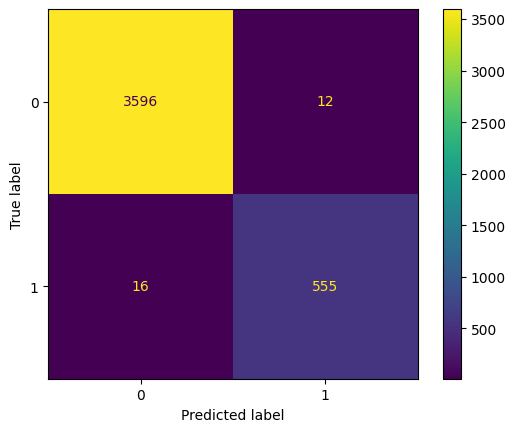

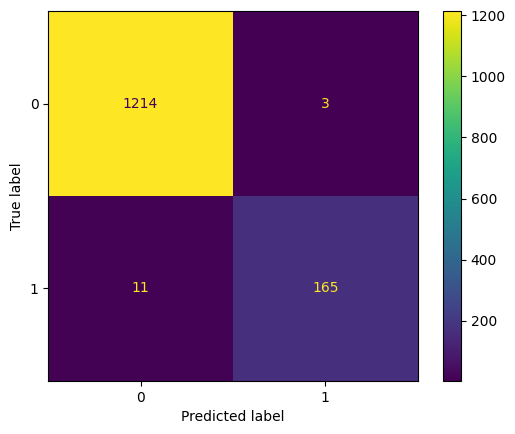

In [12]:
test_nb(MultinomialNB())

((0.9858817899018905, 0.9813352476669059),
 (0.9497016197783461, 0.9281767955801105),
 (<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0efcca7490>,
  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0efabeea70>))

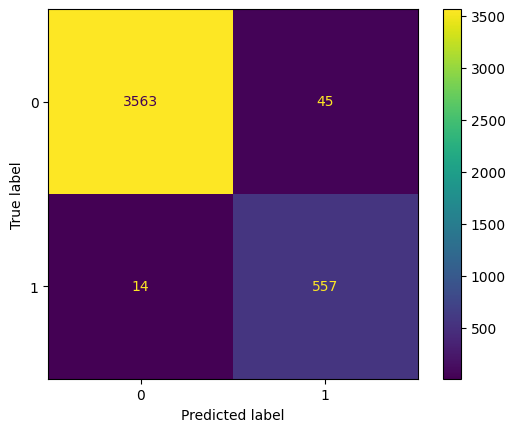

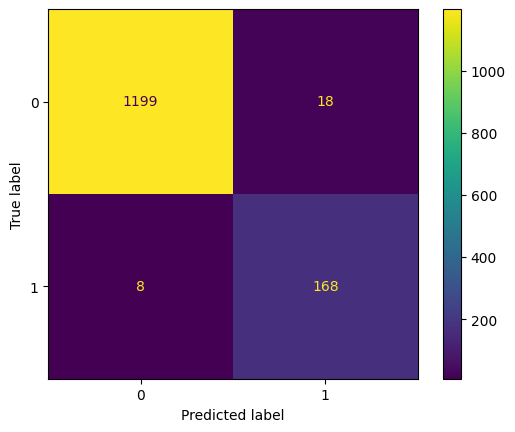

In [13]:
test_nb(ComplementNB())

((0.9875568317779373, 0.9791816223977028),
 (0.95264116575592, 0.9107692307692309),
 (<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0efcd6bfd0>,
  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0efa94f430>))

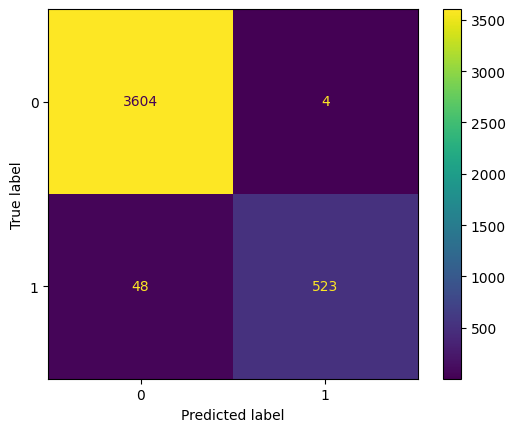

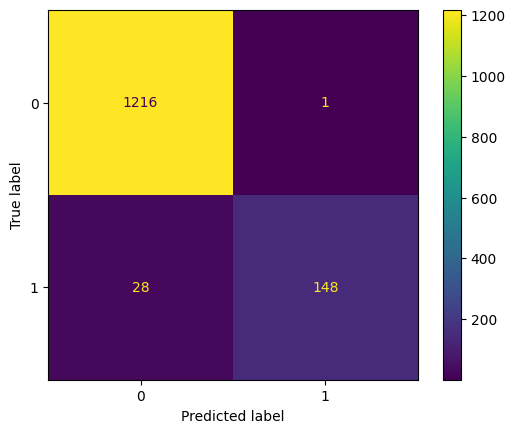

In [14]:
test_nb(BernoulliNB())

In [15]:
# visualize the common words with wordcloud
def visualize(label):
    data = df[labels == label]['v2']
    message = ''
    for msg in data:
        message += msg.lower() + ' '
    return WordCloud(width=600, height=400).generate(message).to_image()

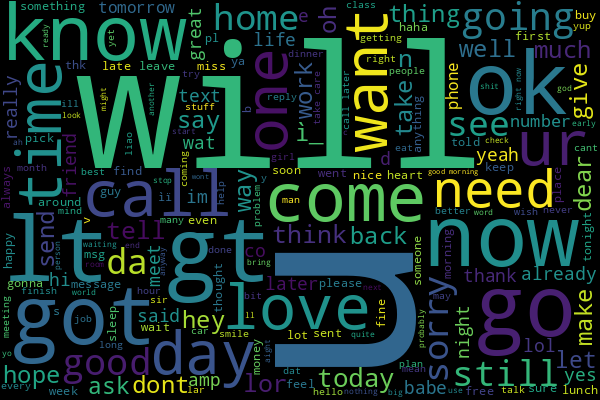

In [16]:
visualize(0)  # not spam

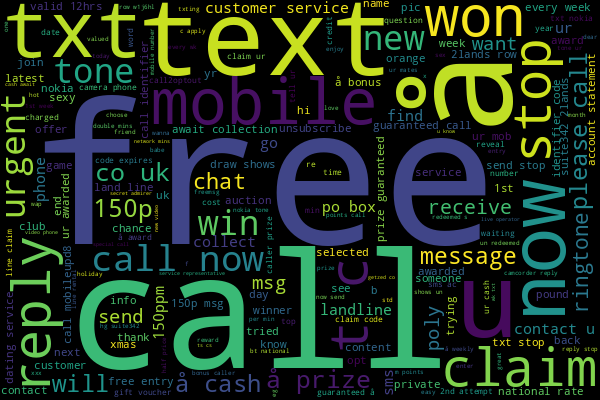

In [17]:
visualize(1)  # spam

In [22]:
# what words are we getting wrong?
def analyze(nb):
    nb.fit(Xtrain, Ytrain)
    P = nb.predict(X)
    should_spam = inputs.iloc[
        [i for i, j, k in zip(range(len(inputs)), labels, P) if j == 1 and k == 0]
    ]  # type: ignore
    not_spam = inputs.iloc[
        [i for i, j, k in zip(range(len(inputs)), labels, P) if j == 0 and k == 1]
    ]  # type: ignore
    return list(should_spam), list(not_spam)

In [23]:
analyze(MultinomialNB())

(["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
  'Did you hear about the new \\Divorce Barbie\\"? It comes with all of Ken\'s stuff!"',
  "Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?",
  'Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)',
  'Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r',
  'Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.',
  'CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA',
  'Would you like to see my XXX pics they are so hot they were nearly banned in the uk!'